# Basic Statistics & Data Preprocessing on Sales & Discounts Dataset


# 1. Introduction
This assignment aims to perform descriptive analytics and data preprocessing on a sales dataset that contains details like transaction volume, discounts, pricing, and categorical metadata such as brand, model, city, etc. The goal is to explore the distribution, identify skewness and outliers, and prepare the dataset for further machine learning analysis by applying standardization and one-hot encoding.


In [1]:

import pandas as pd
file_path="D:\Data sciences\Assignments\Assignment files\Assignment files Extracs\Basic stats - 1\sales_data_with_discounts.csv"
df=pd.read_csv(file_path)
df


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [2]:

#  1. Import Required Libraries and Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# Display basic dataset info
print(" Dataset Information:")
df.info()


 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


 # 2. Descriptive Statistics for Numerical Columns
We computed the mean, median, mode, and standard deviation for all numerical columns to understand the central tendency and variability.


In [3]:

#  2. Descriptive Statistics for Numerical Columns
# Identify numeric columns (int and float types)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create descriptive statistics DataFrame
desc_stats = pd.DataFrame()
desc_stats['Mean'] = df[num_cols].mean()
desc_stats['Median'] = df[num_cols].median()
desc_stats['Mode'] = df[num_cols].mode().iloc[0]
desc_stats['Standard Deviation'] = df[num_cols].std()

# Show results
print("\n Descriptive Statistics:")
print(desc_stats)

#  Optional: Skewness of Numerical Columns
print("\n Skewness of Numerical Columns:")
for col in num_cols:
    print(f"{col}: {df[col].skew():.2f}")



 Descriptive Statistics:
                           Mean       Median          Mode  Standard Deviation
Volume                 5.066667     4.000000      3.000000            4.231602
Avg Price          10453.433333  1450.000000    400.000000        18079.904840
Total Sales Value  33812.835556  5700.000000  24300.000000        50535.074173
Discount Rate (%)     15.155242    16.577766      5.007822            4.220602
Discount Amount     3346.499424   988.933733     69.177942         4509.902963
Net Sales Value    30466.336131  4677.788059    326.974801        46358.656624

 Skewness of Numerical Columns:
Volume: 2.73
Avg Price: 1.91
Total Sales Value: 1.53
Discount Rate (%): -1.06
Discount Amount: 1.91
Net Sales Value: 1.54


# 3. Histograms – Distribution Analysis
We plotted histograms for each numerical column to visualize data distribution.


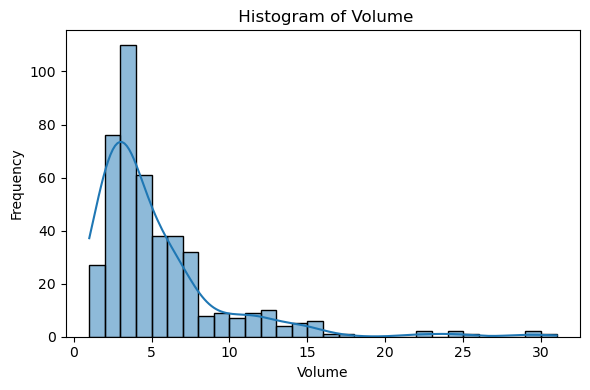

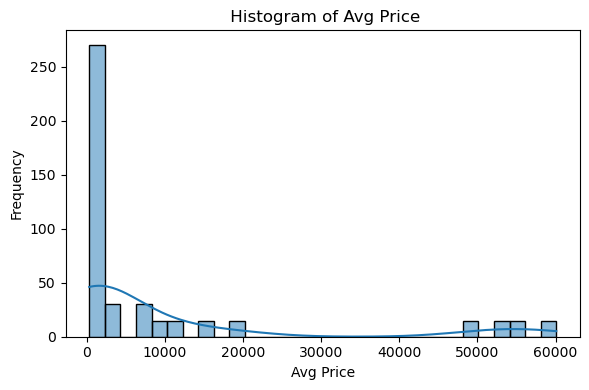

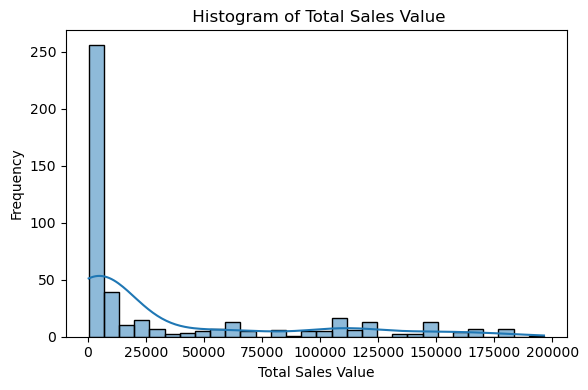

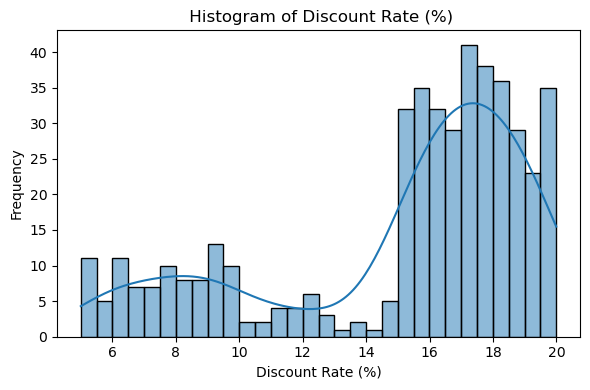

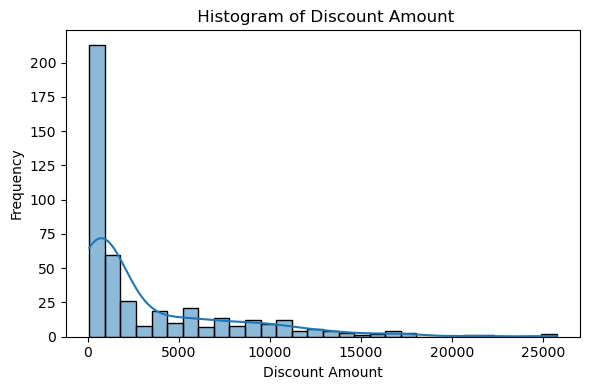

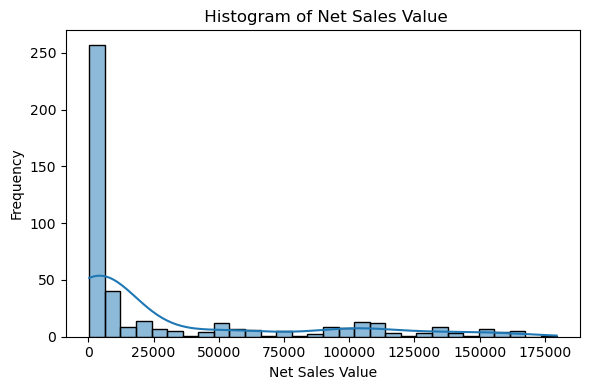

In [4]:

#  3. Histograms for Numerical Columns
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f' Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

Interpretation (based on skewness):

•	Volume (Skewness: 2.73): Heavily right-skewed → most products have small sales volumes.

•	Avg Price (1.91), Total Sales Value (1.53), Net Sales Value (1.54): All right-skewed.

•	Discount Rate (-1.06): Left-skewed — many products have higher discount rates.


#  4. Boxplots – Outlier Detection
Boxplots help us detect outliers and interquartile range (IQR).


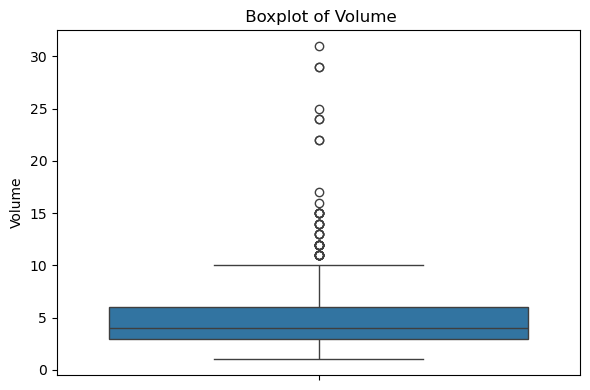

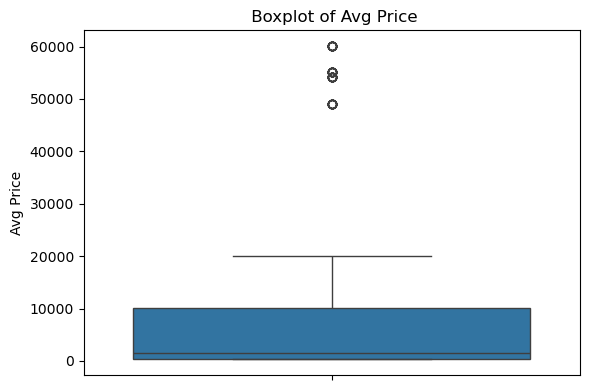

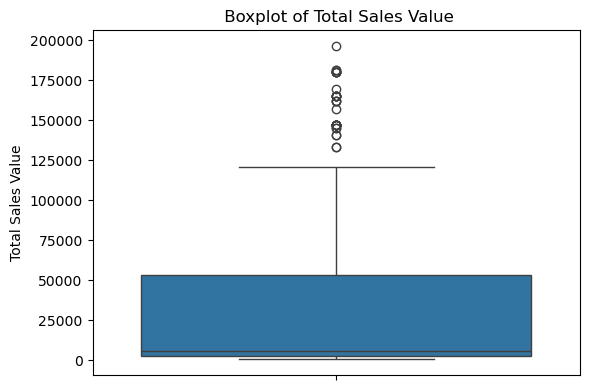

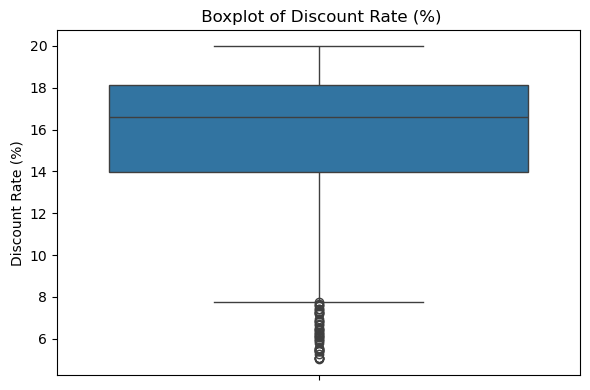

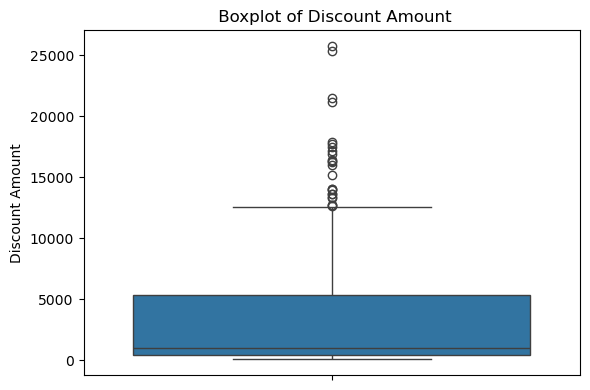

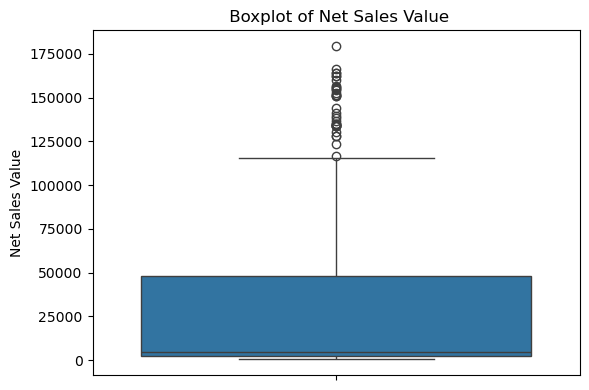

In [5]:

#  4. Boxplots for Numerical Columns
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f' Boxplot of {col}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


In [6]:

#   IQR and Outlier Summary
print("\n Outlier Summary using IQR:")
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f"{col}: IQR = {IQR:.2f}, Outliers = {len(outliers)}")



 Outlier Summary using IQR:
Volume: IQR = 3.00, Outliers = 44
Avg Price: IQR = 9635.00, Outliers = 60
Total Sales Value: IQR = 50500.00, Outliers = 36
Discount Rate (%): IQR = 4.15, Outliers = 45
Discount Amount: IQR = 4856.04, Outliers = 24
Net Sales Value: IQR = 45645.70, Outliers = 35


Column	IQR	Outliers

Volume	3.00	44

Avg Price	9,635.00	60

Total Sales Value	50,500.00	36

Discount Rate (%)	4.15	45

Discount Amount	4,856.04	24

Net Sales Value	45,645.70	35
 Interpretation:

•	Avg Price and Volume have significant outliers.

•	Boxplots confirm large variances in pricing and discounting.


# 5. Bar Charts for Categorical Columns
Categorical columns like Day, City, Brand, etc., were visualized using bar charts.


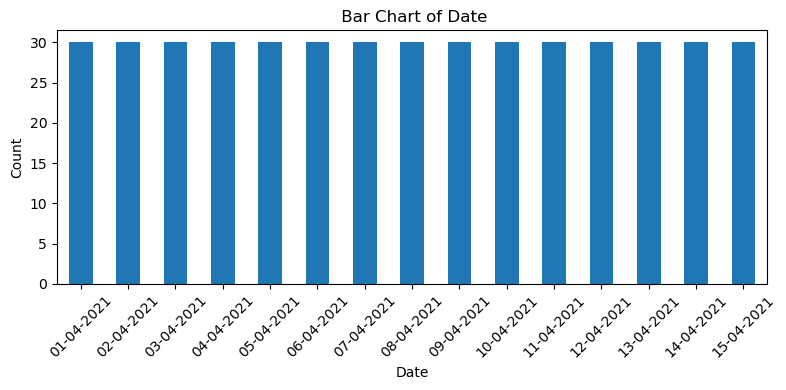

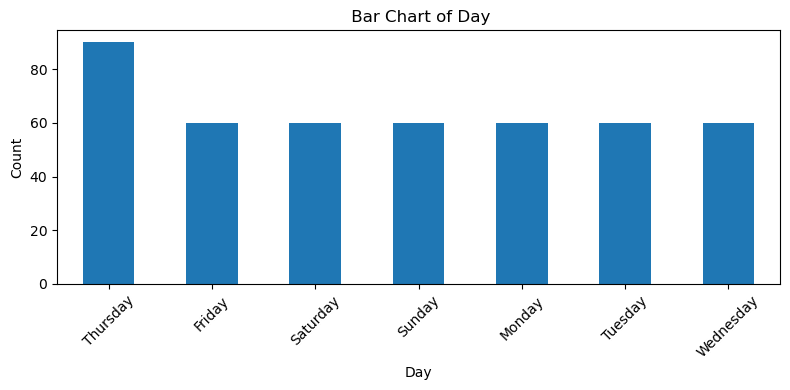

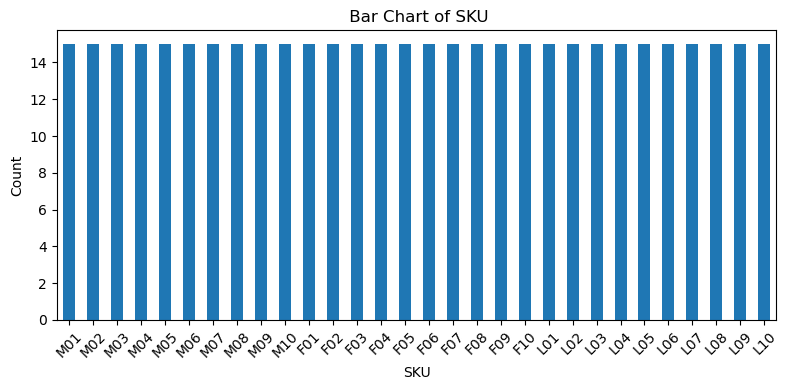

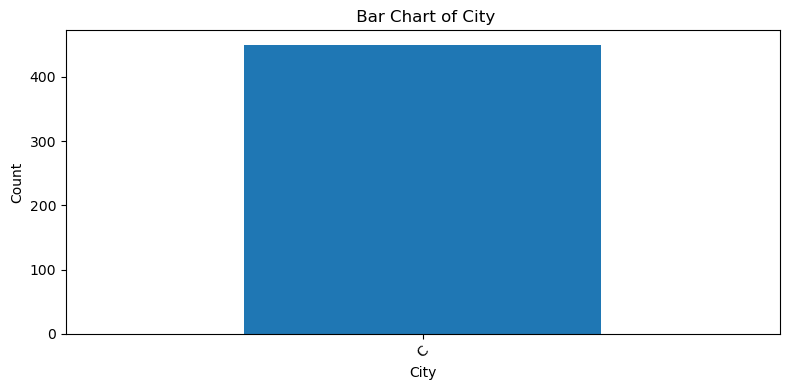

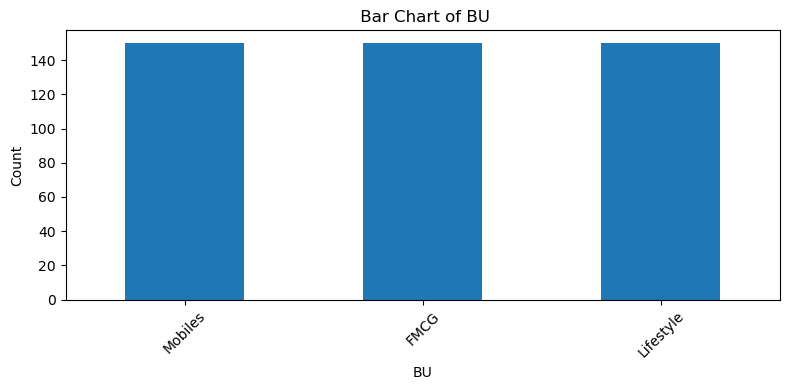

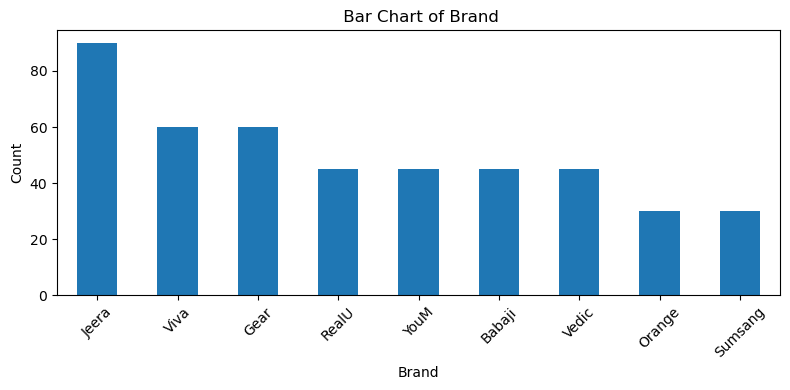

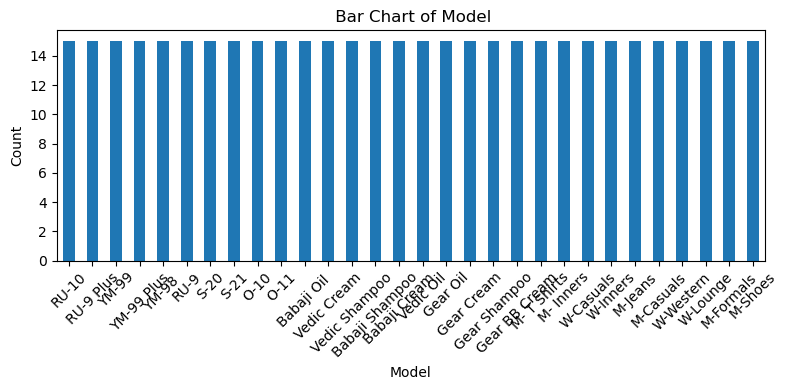

In [7]:

#  5. Bar Charts for Categorical Columns
cat_cols = df.select_dtypes(include='object').columns.tolist()

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f' Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Insights:

•	Most frequent sale days, brands, and cities can be inferred from bar heights.

•	If one brand or city dominates, it may bias the model unless handled properly.


# 6. Standardization (Z-Score Normalization)
We applied z-score normalization to scale all numerical features.


In [8]:

#  6. Standardization (Z-score Normalization)
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[num_cols] = scaler.fit_transform(df[num_cols])

print("\n Before Standardization:")
print(df[num_cols].describe())

print("\n After Standardization:")
print(df_standardized[num_cols].describe())


 Before Standardization:
           Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.000000    450.000000         450.000000         450.000000   
mean     5.066667  10453.433333       33812.835556          15.155242   
std      4.231602  18079.904840       50535.074173           4.220602   
min      1.000000    290.000000         400.000000           5.007822   
25%      3.000000    465.000000        2700.000000          13.965063   
50%      4.000000   1450.000000        5700.000000          16.577766   
75%      6.000000  10100.000000       53200.000000          18.114718   
max     31.000000  60100.000000      196400.000000          19.992407   

       Discount Amount  Net Sales Value  
count       450.000000       450.000000  
mean       3346.499424     30466.336131  
std        4509.902963     46358.656624  
min          69.177942       326.974801  
25%         460.459304      2202.208645  
50%         988.933733      4677.788059  
75%        5316.495427

•	Mean ~ 0, Std ~ 1 for all → confirms correct application.
 Purpose:

•	Brings all features to the same scale

•	Essential before using models like KNN, PCA, Logistic Regression


#  7. One-Hot Encoding (Dummy Variables)
All categorical columns were transformed into binary using one-hot encoding.


In [9]:

# 7. One-Hot Encoding for Categorical Columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("\n Encoded Data Preview (First 5 Rows):")
print(df_encoded.head())



 Encoded Data Preview (First 5 Rows):
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0    160346.501180            False            False            False   
1     89323.897039            False            False            False   
2    102042.089843            False            False            False   
3    112235.925298            False            False            False   
4     19927.053770            False            False            False   

   Date_05-04-2021  ...  Model_Vedic Cream  Mod

 Result:

•	Original 7 categorical columns → Expanded to 94 total columns

•	Necessary for algorithms that can’t handle non-numeric inputs


# 8. Conclusion
In this assignment, we:

•	Performed detailed descriptive analytics using statistical measures and visualizations.

•	Identified skewed variables and outliers using histograms and boxplots.

•	Preprocessed data using:

o	Z-score normalization (standardization)

o	One-hot encoding for categorical variables
